#### **This notebook looks into age of repliers**

In [1]:
import pandas as pd
import numpy as np

import datetime
import warnings
import glob

import importlib

#### packages
import helper.visualization as viz_hp

#### **Load Age function**

In [3]:
def convert_to_naive(dt):
    if dt.tzinfo is not None:
        return dt.tz_convert(None)
    
    return dt

def get_age_of_replier(df):
    '''
    Get age of repliers
    '''
    # df['created_at'] = pd.to_datetime(df['created_at'])
    # df['created_at'] = df['created_at'].apply(
    #     lambda x: convert_to_naive(x)
    # )
    
    import datetime
    import pytz

    utc=pytz.UTC
    
    df['created_at'] = df['created_at'].apply(lambda x: x.replace(
        tzinfo=None
    ))
    df = df.sort_values(by='created_at',
                        ascending=False
                       )
    df_grouped = df.groupby(['replier_userid',
                             'tweet_label',
                             'replier_label'
                            ]).first().reset_index()

    df_grouped[f'created_at_year'] = df_grouped.created_at.map(
                lambda x: x.strftime('%Y-%m-%d'))

    df_grouped['created_at_year'] = pd.to_datetime(df_grouped['created_at_year'])
    df_grouped['tweet_time_year'] = pd.to_datetime(df_grouped['tweet_time_year'])

    df_grouped['age'] = (df_grouped['tweet_time_year'] - df_grouped['created_at_year']) / np.timedelta64(1, 'Y')
    
    return df_grouped

#### **Load data**

In [4]:
# importlib.reload(config_hp)

# config = config_hp.config()
# replier_conversation = config['REPLIER_CONVERSATION']

# positive_replier = replier_conversation['positive_replier']
# df_pos = pd.read_pickle(positive_replier)

# df_age = get_age_of_replier(df_pos)

#### **Save age**

In [48]:
# config = config_hp.config()
# user_feat = config['USER_FEATURES']

# df_age.to_pickle(user_feat['just_age'])

#### **Statistics**

In [53]:
config = config_hp.config()
user_feat = config['USER_FEATURES']
user_feat['just_age']

age_file = './../data/'
df_age = pd.read_pickle(age_file)

df_age = df_age.loc[df_age['age'] < 40]
# df_age['age'] = df_age['age'].apply(lambda x: int(x))
df_1 = df_age.loc[df_age['replier_label'] == 1]
df_0 = df_age.loc[df_age['replier_label'] == 0]

print('Median age 1 :', df_1['age'].median())
print('Median age 0 :', df_0['age'].median())

Median age 1 : 0.37235535295043704
Median age 0 : 2.080809325311266


#### **Visualize**

./plots/CCDF_age_replier.png


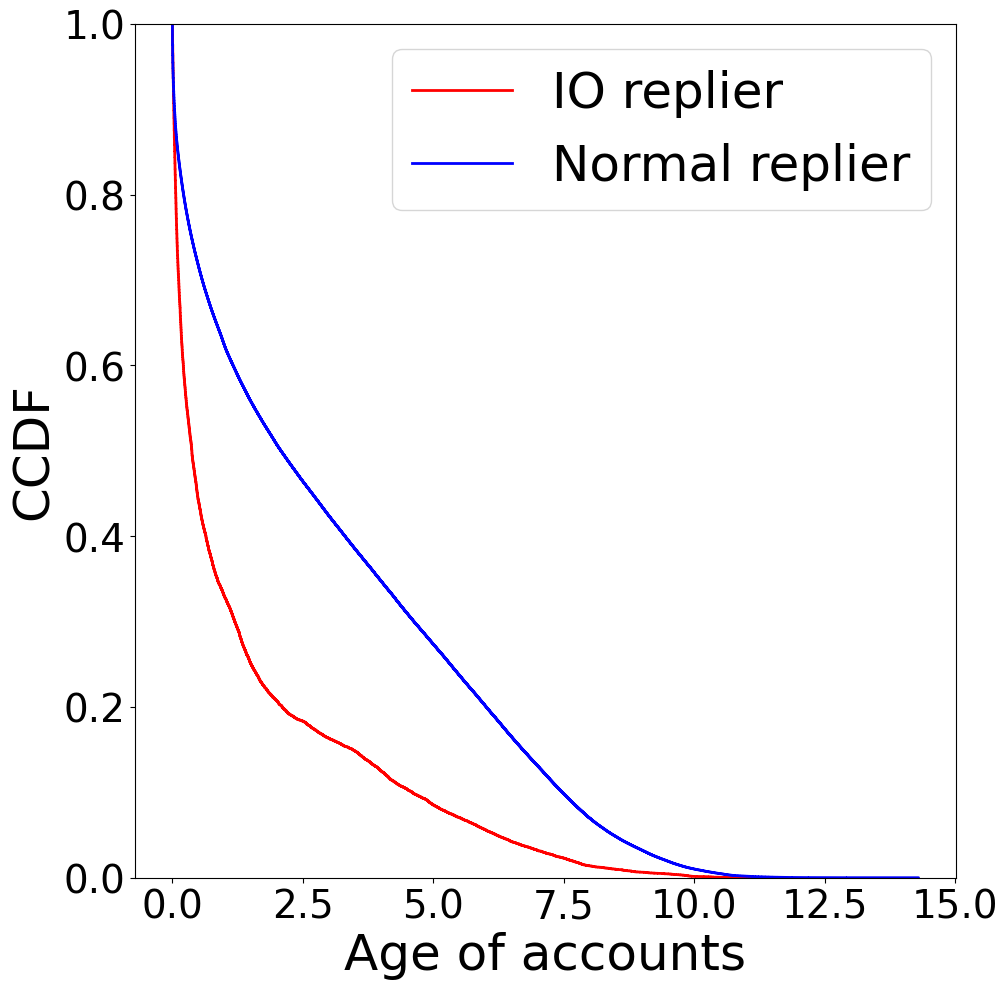

In [54]:
import helper.visualization as viz_hp

importlib.reload(config_hp)
importlib.reload(viz_hp)

parameters = {
        'data': [df_1, 
                 df_0
                ],
    
        'figsize': (10, 10),
        'fontsize': 36,
        'tick_size': 28,
        'complementary': True,
    
        'columns': [
            {'column': 'age',
             'label': 'IO replier',
            },{
            'column': 'age',
             'label': 'Normal replier'
            },
        ],
        'xlabel': 'Age of accounts',
        'ylabel': 'CCDF',
        'legend_location': 'upper right',
        # 'log_yscale': True,
        'log_xscale': False,
        'save': {
            'path': './../plots',
            'filename': 'CCDF_age_replier.png'
        },
        'random_color': False
}


viz_hp.ccdf(parameters)